# Rede neural MLP para classificação de imagens de digitos com scikit-learn

### Import das bibliotecas

In [1]:
import matplotlib.pyplot as plt# Para plotar imagens
from sklearn.datasets import fetch_openml# Importar um dataset chamado MNIST
from sklearn import metrics# Acuracia, Precisao, F1-Score e Recall
from sklearn.neural_network import MLPClassifier# RNA MLP
from sklearn.model_selection import train_test_split as tts# Dividir o dataset em treino e teste

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X = X / 255.0

C:\Users\edvon\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=42, test_size=0.3)

### Criando a rede neural MLP

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10, alpha=1e-4,
                    solver="sgd", verbose=10, random_state=42, learning_rate_init=0.2)

### Visulizando os digitos

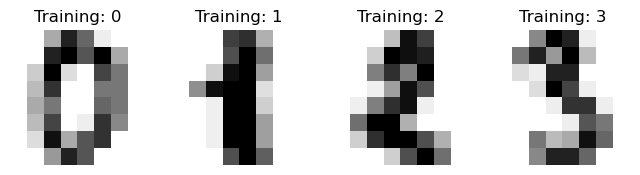

In [11]:
from sklearn import datasets
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### Treinando a rede neural para classificar imagens

In [12]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.77353445
Iteration 2, loss = 0.37512997
Iteration 3, loss = 0.35217598
Iteration 4, loss = 0.34329812
Iteration 5, loss = 0.34012925
Iteration 6, loss = 0.33062665
Iteration 7, loss = 0.32429439
Iteration 8, loss = 0.33367757
Iteration 9, loss = 0.31630443
Iteration 10, loss = 0.31349168


C:\Users\edvon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.2,
              max_iter=10, random_state=42, solver='sgd', verbose=10)

In [13]:
print(f"Acuracia da rede neural: {100 * round(mlp.score(X_test, y_test), 4)}%")

Acuracia da rede neural: 90.71000000000001%


### Calculando outras metricas (Precisao, F1-Score, Recall)

In [14]:
predict_mlp = mlp.predict(X_test)

In [16]:
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_test, predict_mlp)}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.2,
              max_iter=10, random_state=42, solver='sgd', verbose=10):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2058
           1       0.92      0.97      0.95      2364
           2       0.91      0.90      0.90      2133
           3       0.92      0.86      0.89      2176
           4       0.95      0.87      0.91      1936
           5       0.88      0.82      0.85      1915
           6       0.89      0.98      0.93      2088
           7       0.91      0.95      0.93      2248
           8       0.91      0.84      0.87      1992
           9       0.85      0.91      0.88      2090

    accuracy                           0.91     21000
   macro avg       0.91      0.90      0.91     21000
weighted avg       0.91      0.91      0.91     21000




Confusion matrix:
[[1960    2   23    0    2   15   44    3    9    0]
 [   0 2290   14   18    2    2    2   10   22    4]
 [  34   33 1920   10   10    7   53   24   37    5]
 [  15   14   66 1875    2   69   11   70   29   25]
 [   4    9    8    0 1680    4   46    0    3  182]
 [  49   11    9  111   10 1576   57   14   49   29]
 [   4    4   21    0    6    9 2043    0    1    0]
 [  20   10   29    1   13    2    2 2127    5   39]
 [   6   91   24   14    4   94   28   16 1668   47]
 [  11   14    5   16   47   12    1   66    7 1911]]


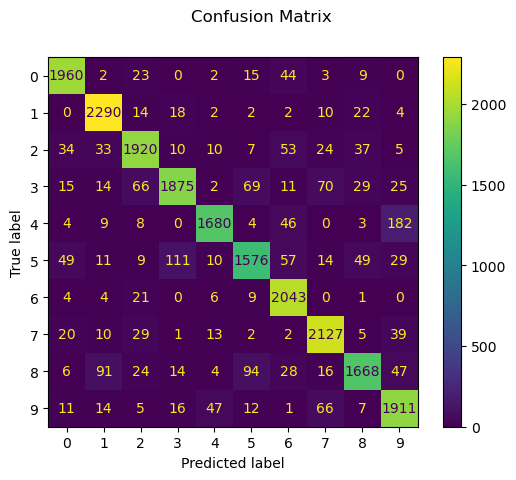

In [18]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict_mlp)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()